Required Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loaded the Ramen Ratings  into a pandas DataFrame and Displayed the first few rows of the dataset

In [2]:
rd = pd.read_csv('/content/ramen-ratings.csv.xls')
rd.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


Checked the data types and non-null counts

In [3]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


Checked for missing values

In [4]:
rd.isnull().sum()

,0
Review #,0
Brand,0
Variety,0
Style,2
Country,0
Stars,0
Top Ten,2539


Dropped rows with missing ratings and Converted 'Stars' to a numeric type

In [5]:
rd = rd.dropna(subset=['Stars'])
rd['Stars'] = pd.to_numeric(rd['Stars'], errors='coerce')


Got the top 10 rated ramen and
Displayed the top 10 rates ramen

In [6]:
top_10_ramen = rd.nlargest(10, 'Stars')

print(top_10_ramen[['Brand', 'Style', 'Country', 'Stars']])


               Brand Style      Country  Stars
10       Tao Kae Noi  Pack     Thailand    5.0
11          Yamachan  Pack          USA    5.0
14            Nissin  Pack    Hong Kong    5.0
17          Yamachan  Pack          USA    5.0
21  Jackpot Teriyaki  Pack          USA    5.0
22              KOKA   Cup    Singapore    5.0
28           MyKuali  Bowl     Malaysia    5.0
30     Samyang Foods  Pack  South Korea    5.0
35              KOKA  Pack    Singapore    5.0
37              KOKA   Cup    Singapore    5.0


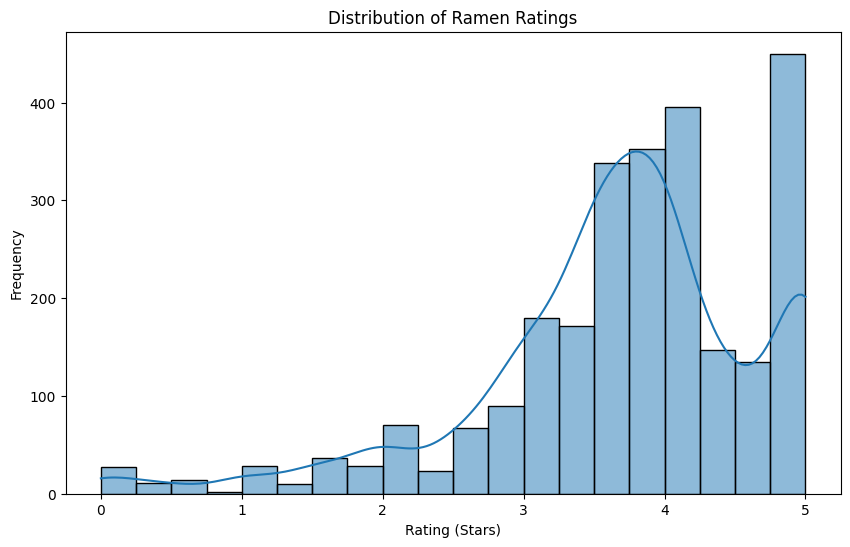

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(rd['Stars'], bins=20, kde=True)
plt.title('Distribution of Ramen Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-8-b039a1a694bd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stars', y='Country', data=top_countries, palette='viridis')


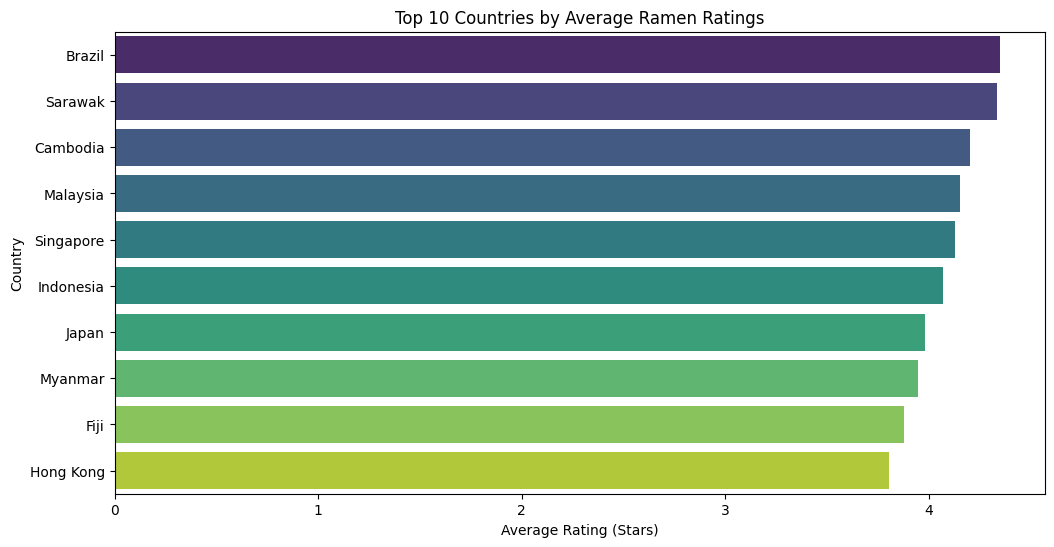

In [8]:
country_ratings = rd.groupby('Country')['Stars'].mean().reset_index()
top_countries = country_ratings.nlargest(10, 'Stars')

plt.figure(figsize=(12, 6))
sns.barplot(x='Stars', y='Country', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Average Ramen Ratings')
plt.xlabel('Average Rating (Stars)')
plt.ylabel('Country')
plt.show()


Top-rated ramen brands: List the top 10 ramen brands based on their  ratings.

Best countries for ramen: Identify which countries have the highest average ratings.

Popular ramen styles: Highlight the ramen styles that receive the highest ratings

<ipython-input-9-e6eeadfad0cf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stars', y='Style', data=top_styles, palette='plasma')


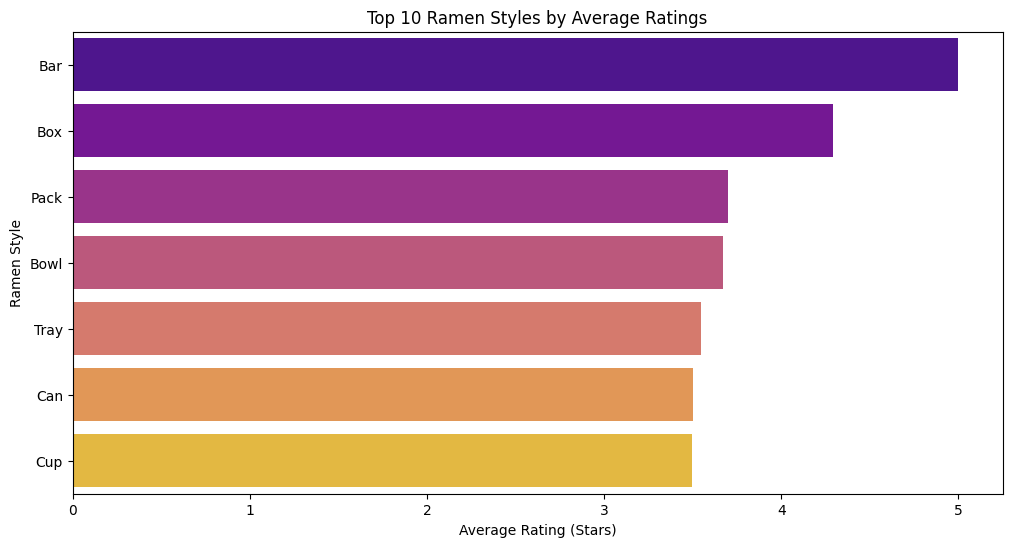

In [9]:
style_ratings = rd.groupby('Style')['Stars'].mean().reset_index()
top_styles = style_ratings.nlargest(10, 'Stars')

plt.figure(figsize=(12, 6))
sns.barplot(x='Stars', y='Style', data=top_styles, palette='plasma')
plt.title('Top 10 Ramen Styles by Average Ratings')
plt.xlabel('Average Rating (Stars)')
plt.ylabel('Ramen Style')
plt.show()

The bar plot is used to visually compare the average ratings of the top 10 ramen styles. By plotting the styles on the y-axis and their corresponding average ratings (stars) on the x-axis, the chart clearly shows which ramen styles are rated the highest. This makes it easy to quickly identify and compare the top-performing styles, as the lengths of the bars represent the ratings. The color palette enhances the visual appeal, making the differences between the ratings more distinct and easier to interpre

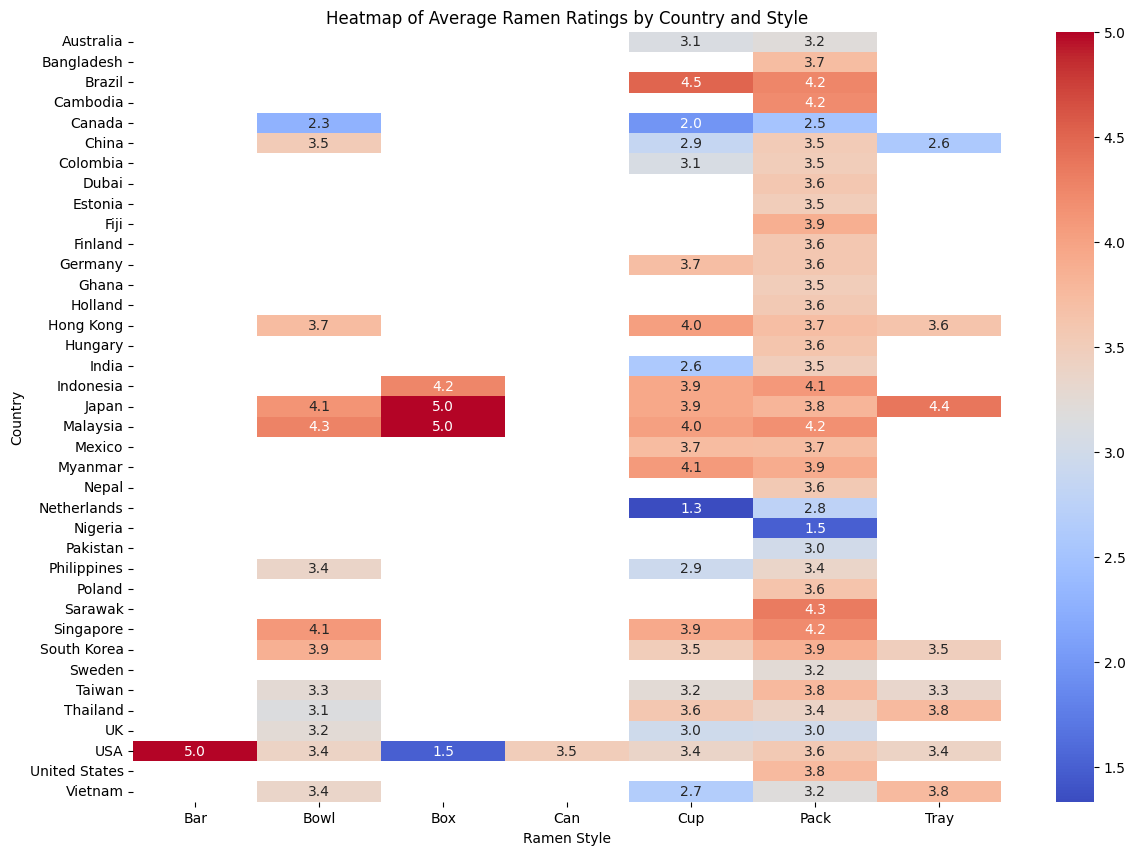

In [10]:
pivot_table = rd.pivot_table(values='Stars', index='Country', columns='Style', aggfunc='mean')
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Heatmap of Average Ramen Ratings by Country and Style')
plt.xlabel('Ramen Style')
plt.ylabel('Country')
plt.show()

In essence, the heatmap provides a quick and clear visualization of how ramen ratings vary across different countries and styles. By using color to represent the average ratings, it allows for easy comparison between countries and ramen styles. This makes it much simpler to spot patterns and insights, such as which countries consistently produce highly rated ramen in particular styles, compared to analyzing the data in a raw table format. The use of color intensities in the heatmap helps to highlight key trends that would otherwise be difficult to detect in numerical form

<ipython-input-11-4190025fd4f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Style', data=rd, order=rd['Style'].value_counts().index, palette='viridis')


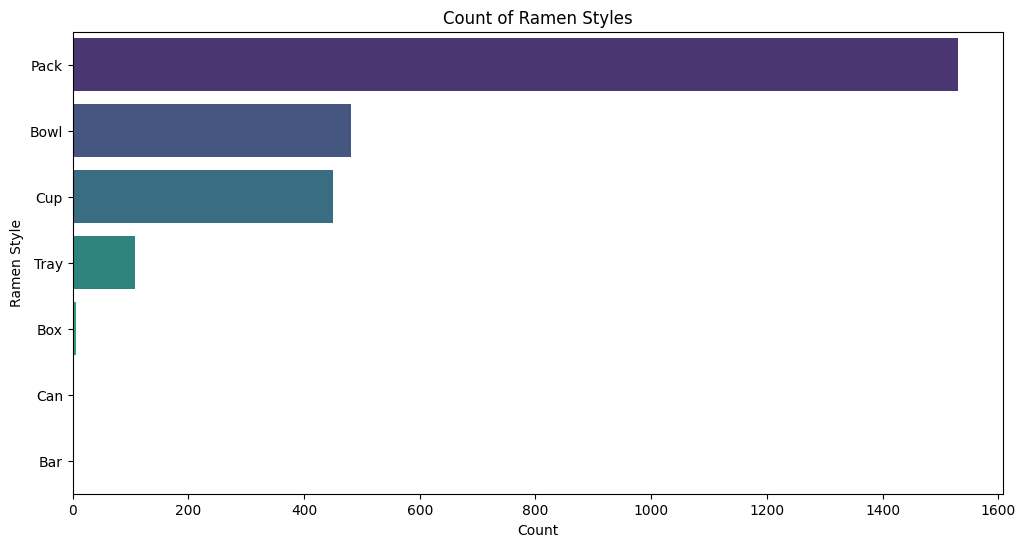

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Style', data=rd, order=rd['Style'].value_counts().index, palette='viridis')
plt.title('Count of Ramen Styles')
plt.xlabel('Count')
plt.ylabel('Ramen Style')
plt.show()

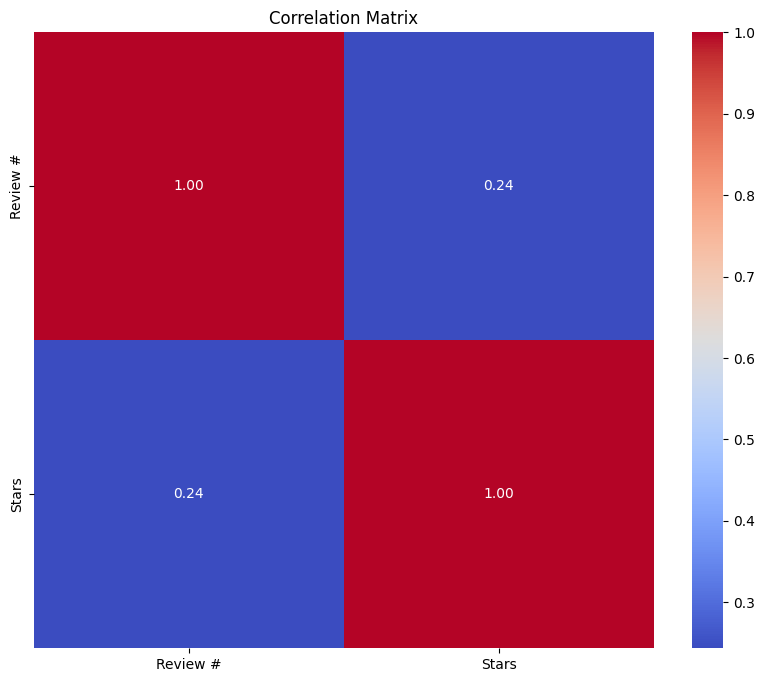

In [16]:
numerical_rd = rd.select_dtypes(include=np.number)
correlation_matrix = numerical_rd.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<ipython-input-14-5a6fc776669c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Stars', data=Brand_ratings, palette='muted')


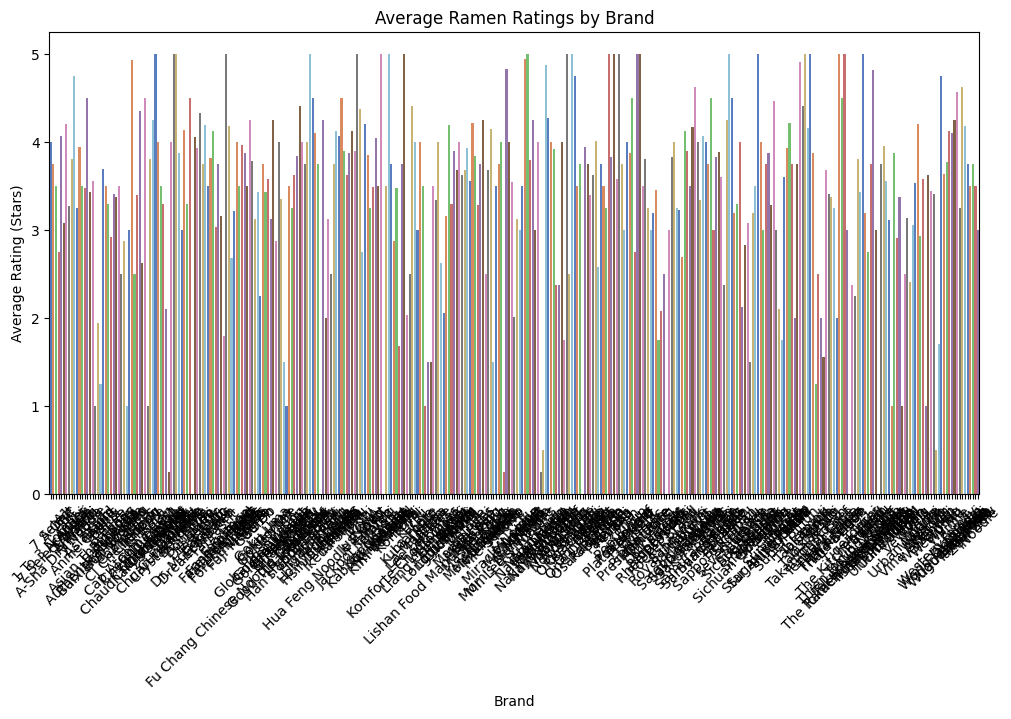

In [14]:
Brand_ratings = rd.groupby('Brand')['Stars'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Brand', y='Stars', data=Brand_ratings, palette='muted')
plt.title('Average Ramen Ratings by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating (Stars)')
plt.xticks(rotation=45)
plt.show()

This code calculates the average ratings of ramen by brand and visualizes the results in a bar plot. It first groups the data by brand and computes the mean of the ratings. Then, it creates a bar plot where each bar represents a brand, and the height of the bar indicates the average rating. The plot includes labels for the x and y axes and a title for clarity. By examining the resulting plot, you can quickly identify which brands have higher or lower average ratings, providing valuable insights into the data